# Iris Species

This is a machine learning project for my portfolio with the goal of showcasing my Exploratory Data Analysis skills.

## Problem Definition

* Classify iris plants into three species in this classic dataset
* Perform Exploratory Data Analysis
  
## Data

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository(https://archive.ics.uci.edu/dataset/53/iris).

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

You can find more information about the dataset here: https://archive.ics.uci.edu/dataset/53/iris (UCI) | https://www.kaggle.com/datasets/uciml/iris (Kaggle)

We will however import the dataset using scikit-learn.

## Import Libraries (Seting up the workspace)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## Load the Dataset

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## Data understanding and cleaning

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

np.int64(1)

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [13]:
df_tmp = df.copy()
df_tmp['species'] = df_tmp['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

## Exploratory Data Analysis

### Univariate Analysis

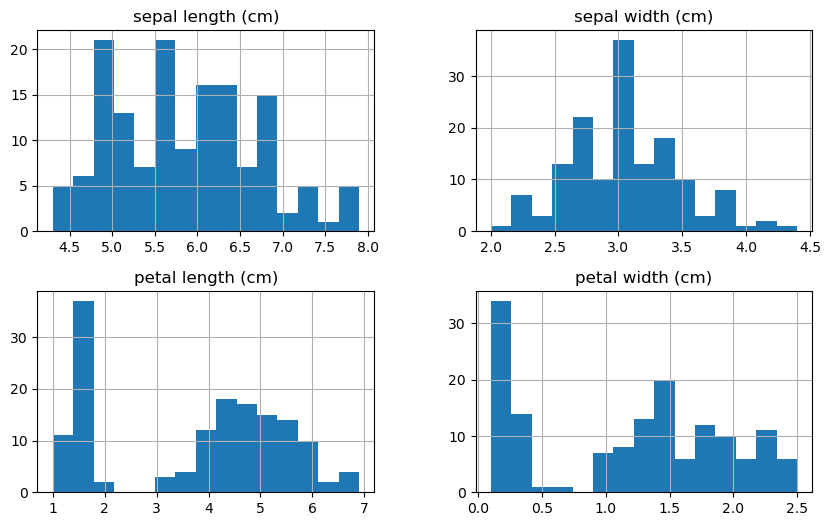

In [14]:
# Distribution of features
df.hist(figsize=(10, 6), bins=15)
plt.show()

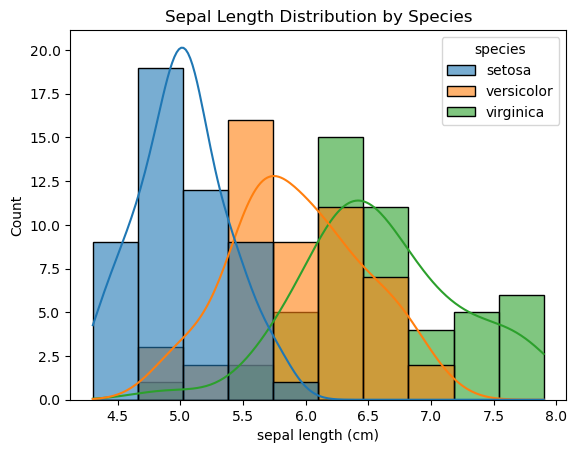

In [15]:
# histogram for distribution
sns.histplot(data=df, x="sepal length (cm)", hue="species", kde=True, bins=10, alpha=0.6)
plt.title("Sepal Length Distribution by Species")
plt.show()

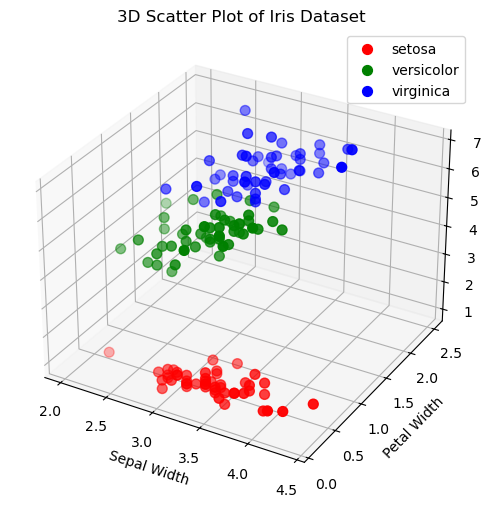

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Define colors
colors = ["r", "g", "b"]
species_labels = iris.target_names

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for i in range(3):  # 3 species in Iris
    subset = df_tmp[df_tmp["species"] == i]
    ax.scatter(subset["sepal width (cm)"], subset["petal width (cm)"], subset["petal length (cm)"],
               label=species_labels[i], color=colors[i], s=50)

# Labels
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Petal Length")
ax.set_title("3D Scatter Plot of Iris Dataset")

ax.legend()
plt.show()


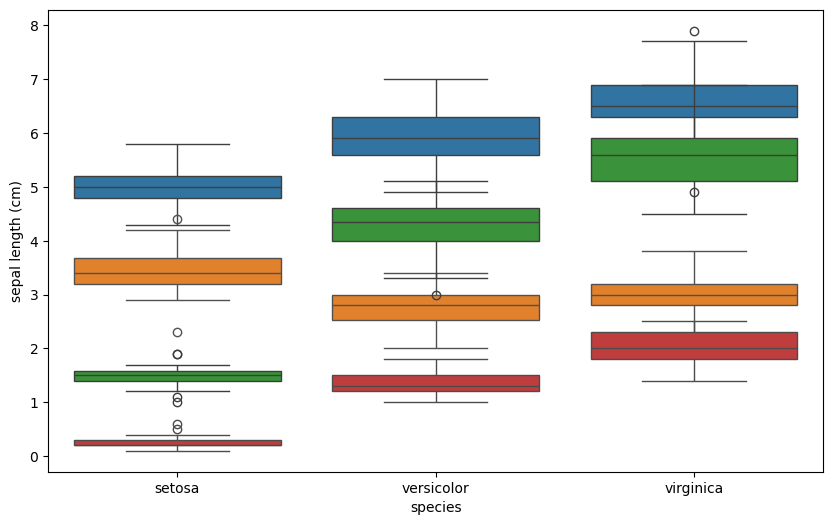

In [17]:
# Box plot for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="species", y="sepal length (cm)")
sns.boxplot(data=df, x="species", y="sepal width (cm)")
sns.boxplot(data=df, x="species", y="petal length (cm)")
sns.boxplot(data=df, x="species", y="petal width (cm)")
plt.show()

### Bivariate analysis

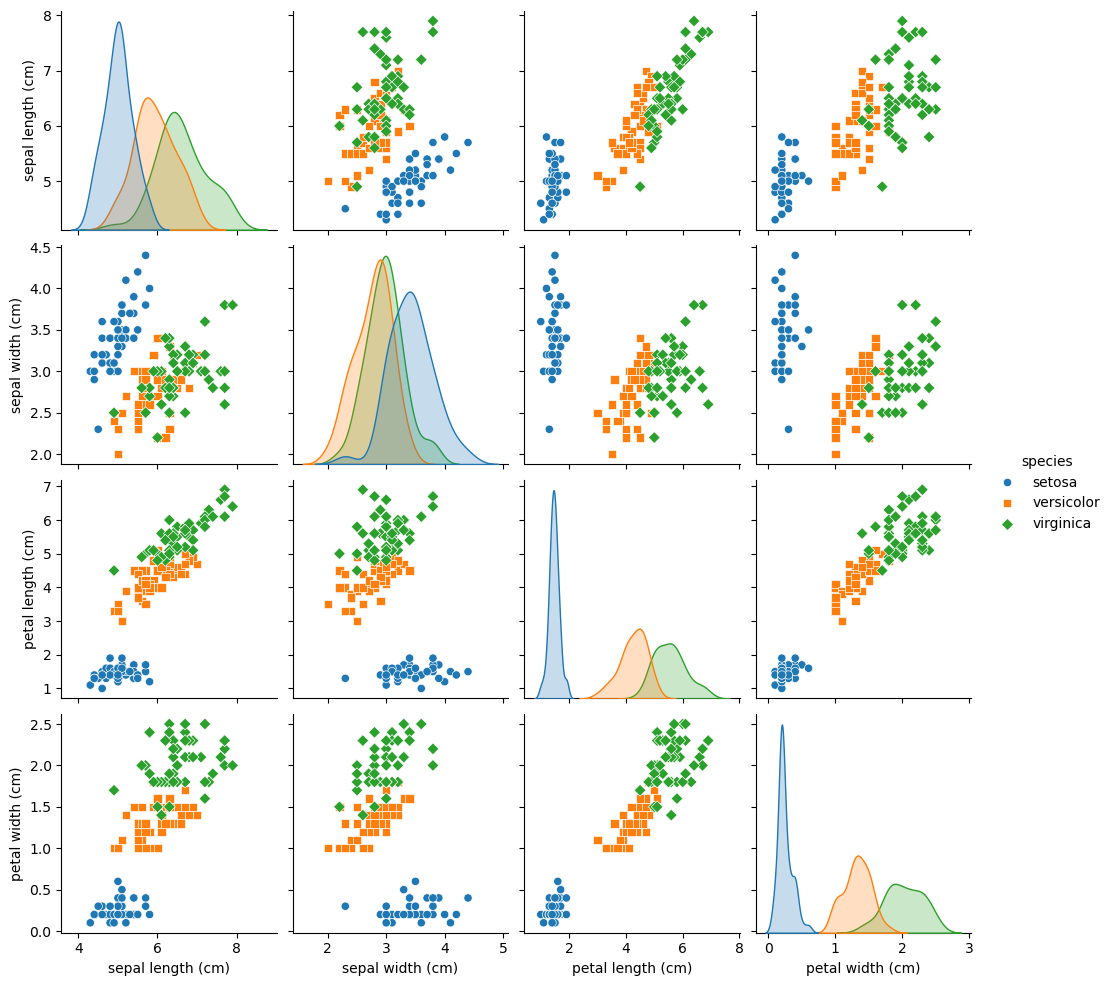

In [18]:
# Pairplot for relationships
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

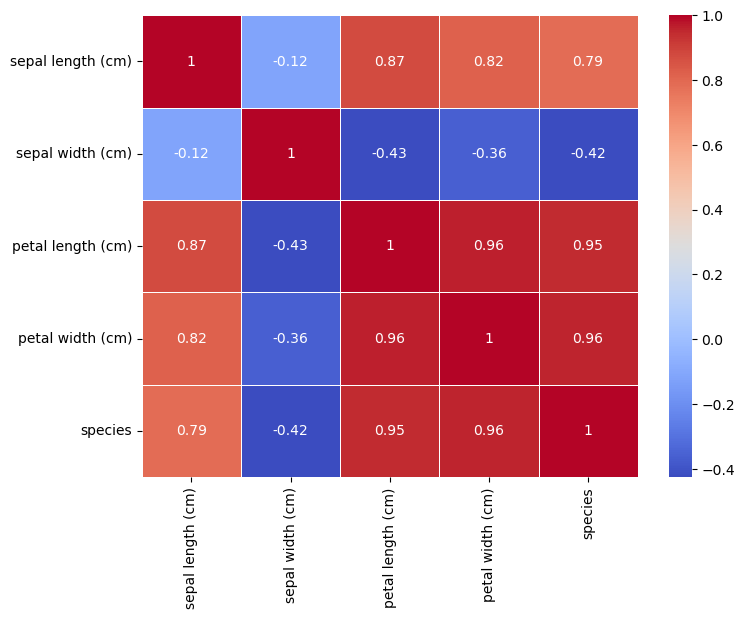

In [19]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_tmp.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

### Comparing feature distributions

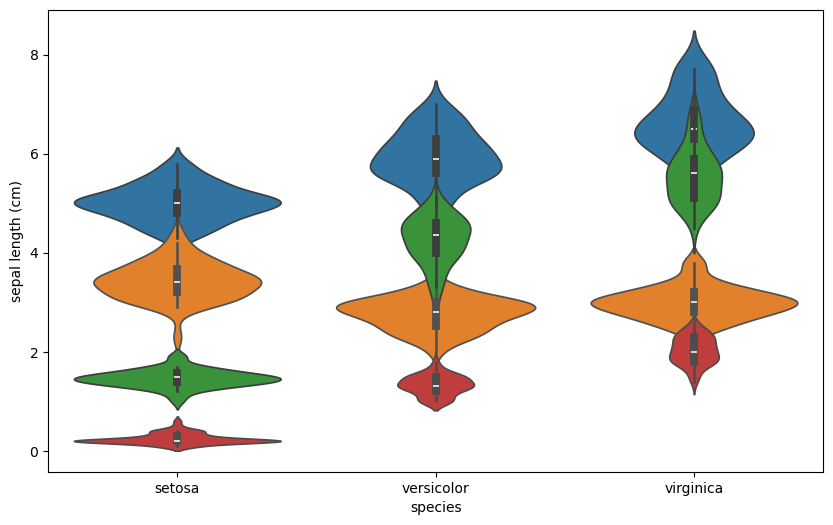

In [20]:
# Violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="sepal length (cm)", data=df)
sns.violinplot(x="species", y="sepal width (cm)", data=df)
sns.violinplot(x="species", y="petal length (cm)", data=df)
sns.violinplot(x="species", y="petal width (cm)", data=df)
plt.show()

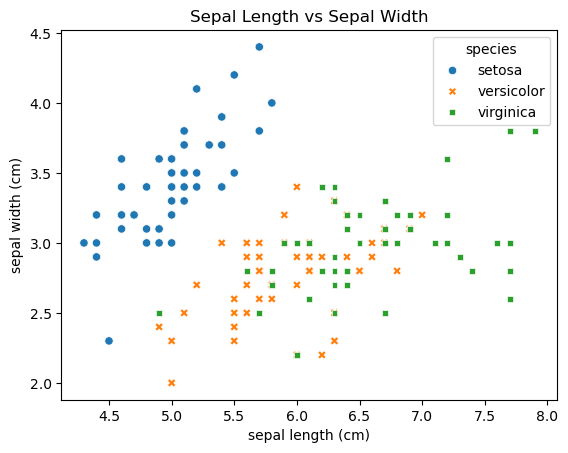

In [21]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="species", style="species")
plt.title("Sepal Length vs Sepal Width")
plt.show()

## Train-Test split

In [22]:
# Make a copy of the dataset
df_cpy = df.copy()

In [23]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [24]:
# convert species dtype 
df_cpy['species'] = df_cpy['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [25]:
from sklearn.model_selection import train_test_split

# Split X and Y
X = df_cpy.drop('species', axis=1)
y = df_cpy['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
len(X_train), len(y_train), len(X_test), len(y_test)

(119, 119, 30, 30)

## Building and Fitting the model

Since this dataset is a very simple dataset, using complex models would not be necessary. Therefore, we can just use `LogisticRegression()`

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Perform predictions and evaluating Accuracy Score

In [28]:
preds = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Prediction score Accuracy: ", accuracy_score(y_test, preds))

Prediction score Accuracy:  1.0


### Cross validation accuracy

In [30]:
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9666666666666668


## Saving the model

In [31]:
import pickle

pickle.dump(clf, open("iris_logistic_regression_classifier_model_1.pkl", "wb"))

## Feature importance

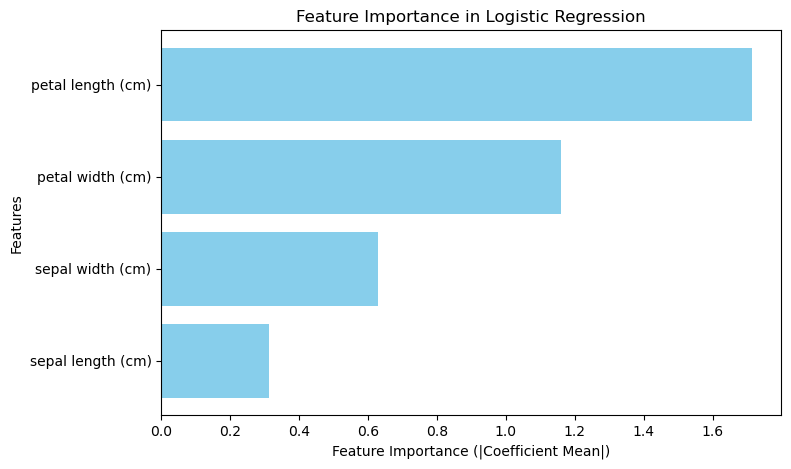

In [32]:
# Get feature importance (absolute coefficient values)
feature_importance = np.mean(np.abs(clf.coef_), axis=0)  # Average across all classes

# Create a DataFrame for visualization
feature_names = iris.feature_names
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance (|Coefficient Mean|)")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance on top
plt.show()

## Displaying Decision Boundary (Logistic regression)

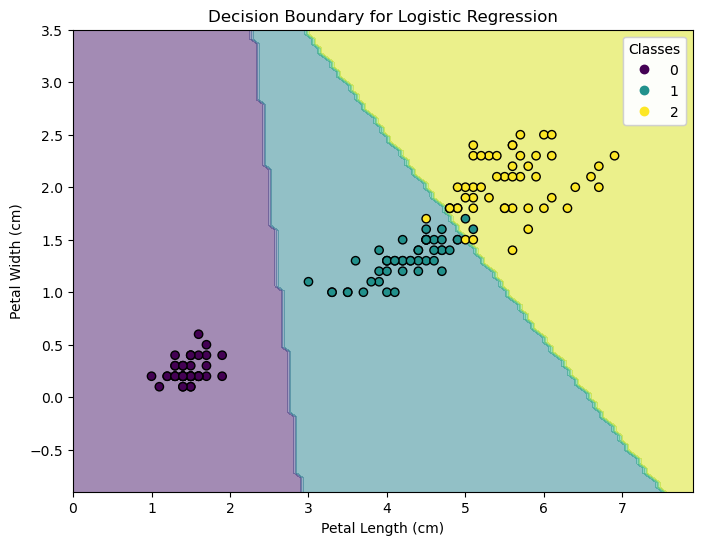

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay

# Select only two features for visualization
X = df_cpy[["petal length (cm)", "petal width (cm)"]].values  # Only two features
y = df_cpy["species"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression using ONLY two features
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Train only on selected features

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,  # Ensure this matches the trained model's input shape
    ax=ax,
    response_method="predict",
    alpha=0.5,
)

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("Decision Boundary for Logistic Regression")
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Petal Width (cm)")

plt.show()


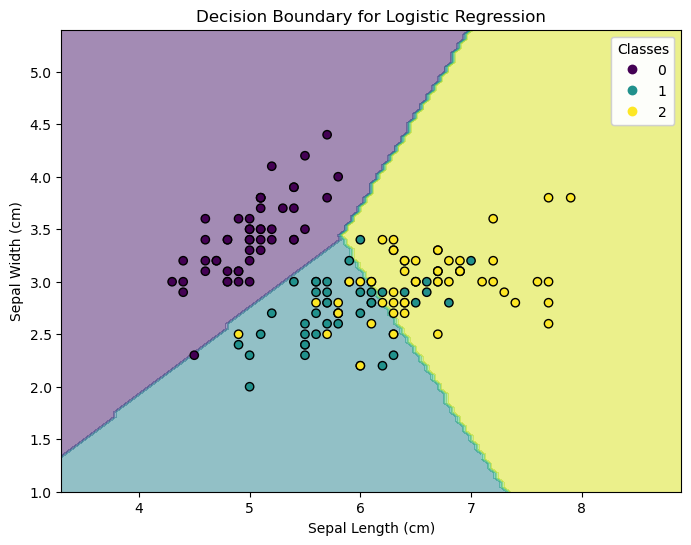

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay

# Select only two features for visualization
X = df_cpy[["sepal length (cm)", "sepal width (cm)"]].values  # Only two features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression using ONLY two features
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Train only on selected features

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,  # Ensure this matches the trained model's input shape
    ax=ax,
    response_method="predict",
    alpha=0.5,
)

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("Decision Boundary for Logistic Regression")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")

plt.show()
